# Project: Clean and Analyse Employee Exit Surveys

## Introduction

In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. We take on the role of a data analyst and our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the results for both surveys to answer these questions.

A data dictionary was not provided with the dataset. In a real life setting, we would meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge and intuition.

Some of the columns we'll work with from the `dete_survey.csv`:

- `ID`: An id used to identify the participant of the survey
- `SeparationType`: The reason why the person's employment ended
- `Cease Date`: The year or month the person's employment ended
- `DETE Start Date`: The year the person began employment with the DETE

Some of the columns we'll work with from the `tafe_survey.csv`:

- `Record ID`: An id used to identify the participant of the survey
- `Reason for ceasing employment`: The reason why the person's employment ended
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years).

Let's start by reading in and familiarising ourselves with the datasets. 

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = 150 # to avoid truncated output

dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [43]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [44]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [45]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [46]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

Some observations based on the initial exploration of the data:

- The `dete_survey` dataset has some missing values that are indicated by `Not Stated` instead of `NaN`.

- Both datasets contain far too many columns that are not useful for our analysis.

- Each dataset contains many of the same columns, but just the column names are different.

- There are many columns indicating that an employee resigned because of job dissatisfaction.

## Identify Missing Values and Drop Unnecessary Columns

Let's start by converting all the missing values into `NaN` values:

In [47]:
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")

Now let's drop the redundant columns in both datasets:

In [48]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

Let's check that the unnecessary columns were indeed dropped:

In [49]:
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

## Clean Column Names

Each dataset contains many of the same columns, with different names. For example:

| `dete_survey` | `tafe_survey` |
| --- | --- |
| ID | Record ID |
| SeparationType | Reason for ceasing employment |
|Cease Date | CESSATION YEAR |
| Age | CurrentAge. Current Age |
| Gender | Gender. What is your gender? |

To standardise the column names in `dete_survey`, let's use vectorised string methods with the `DataFrame.columns` attribute. We will make them all lower case, with no trailing whitespace and replace all spaces with underscores:

In [50]:
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.replace(" ","_").str.lower()
dete_survey_updated.head(1)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes


The `tafe_survey` columns are too wordy and often are repetitive, so we will make the following changes:

- 'Record ID': 'id'
- 'CESSATION YEAR': 'cease_date'
- 'Reason for ceasing employment': 'separationtype'
- 'Gender. What is your Gender?': 'gender'
- 'CurrentAge. Current Age': 'age'
- 'Employment Type. Employment Type': 'employment_status'
- 'Classification. Classification': 'position'
- 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
- 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'

In [51]:
renaming = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(renaming, axis=1)

tafe_survey_updated.head(1)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2


## Filter the Data

Let us now look at the `separationtype` columns in both dataframes:

In [52]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [53]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

There are multiple reasons for employees leaving, but we are only interested in those related to resignation, so we will filter the datasets for these. Note that the `dete_survey` contains multiple separation types related to resignation, so we must make sure we do not leave any of them out when filtering.

Let's convert all the separation types containing "Resignation" into just "Resignation":

In [54]:
dete_survey_updated["separationtype"] = dete_survey_updated["separationtype"].str.split("-").str[0]
dete_survey_updated["separationtype"].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

Now we filter the data for the resignation separation types, using the `DataFrame.copy()` method to avoid the SettingWithCopy Warning.:

In [55]:
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"] == "Resignation"].copy()

tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"] == "Resignation"].copy()

## Verify the Data

Before moving further, let's check whether our data contains any major inconsistencies which may render our analysis invalid. 

A good place to start is by verifying that the `cease_date` and `dete_start_date` columns make sense. It would not make sense for any of these dates to be after the current date. Most people in the field start working in their 20s, so it would not make sense for the `dete_start_date` to contain any values before 1940, say.

In [56]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
07/2006      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

We will first clean this column, by extracting only the year and converting the values to floats.

In [57]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].str[-4:].astype(float)
dete_resignations["cease_date"].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

1975.0     1
1973.0     1
1971.0     1
1982.0     1
1984.0     1
1977.0     1
1963.0     1
1972.0     1
1987.0     1
1974.0     2
1976.0     2
1983.0     2
2001.0     3
1985.0     3
1986.0     3
1991.0     4
1988.0     4
1989.0     4
1995.0     4
1990.0     5
1993.0     5
1980.0     5
1997.0     5
2002.0     6
1996.0     6
1994.0     6
1992.0     6
1998.0     6
2003.0     6
1999.0     8
2000.0     9
2013.0    10
2006.0    13
2009.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64


<AxesSubplot:>

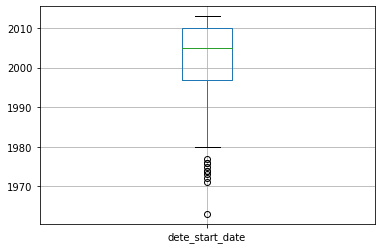

In [58]:
print(dete_resignations["dete_start_date"].value_counts().sort_values())

dete_resignations.boxplot(column = "dete_start_date")

In [59]:
tafe_resignations["cease_date"].value_counts().sort_values()

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

Observations:

- There seem to be some outliers in the start dates in the `dete_survey`, but none of them are before 1940 so this is not a major inconsistency. Moreover, we will not be analysing the results by year so we will leave the data as it is.

## Create a New Column

Recall the main question we would like to answer:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In order to answer this question, we would like to know how long each employee has worked at each of the institutes. In the `tafe_resignations` dataframe, we have this information in the `institute_service` column, which details the number of years of service for each employee. In the `dete_resignations` dataframe we have the `cease_date` and `dete_start_date` values, which we can use to calculate the years of service.

In [60]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

dete_resignations["institute_service"].head(10)

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
12    14.0
14     5.0
16     NaN
20    30.0
21    32.0
Name: institute_service, dtype: float64

Let's visualise the years of service with a histogram:

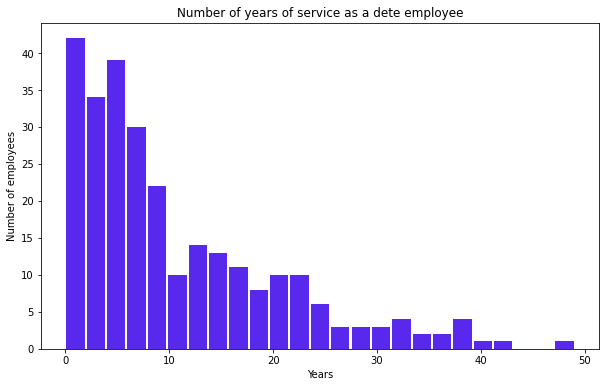

In [87]:
dete_resignations.hist(column = "institute_service", bins=25, grid=False, figsize=(10,6), color='#5928ed', rwidth=0.9)

plt.xlabel("Years")
plt.ylabel("Number of employees")
plt.title("Number of years of service as a dete employee")
plt.show()

In [71]:
tafe_resignations["institute_service"].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

The number of years in the `tafe_resignations` dataframe are already displayed in bins (stored as strings), so we will have to plot these as a bar chart because histograms in matplotlib only accept numerical values.

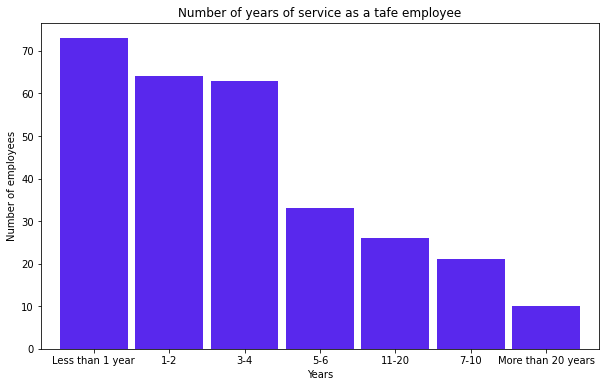

In [105]:
tafe_resignations["institute_service"].value_counts().plot(kind="bar", figsize=(10,6), color='#5928ed', width=0.9)
plt.xticks(rotation=0)
plt.xlabel("Years")
plt.ylabel("Number of employees")
plt.title("Number of years of service as a tafe employee")
plt.show()

## Identify Dissatisfied Employees

Next, we will identify employees who resigned because they were dissatisfied.

In [109]:
tafe_resignations.head(0)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service


In [111]:
dete_resignations.head(0)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service


Upon examination of the columns, we'll use the following columns to categorise employees as dissatisfied:

- From the `tafe_survey`:
    - `Contributing Factors. Dissatisfaction`
    - `Contributing Factors. Job Dissatisfaction`

- From the `dete_survey`:
    - 	`job_dissatisfaction`
    - `dissatisfaction_with_the_department`
    -`physical_work_environment`
    -`lack_of_recognition`
    -`lack_of_job_security`
    -`work_location`
    -`employment_conditions`
    - `work_life_balance`
    - `workload`

If an employee indicated that any of the above factors caused them to resign, we will mark them as dissatisfied. For this, we will create a new `dissatisfied` column with `True` if , `False` or `NaN`. We will write a function to perform this classification. If any value is `True`, we will return `True`. If all are `False`, we will return `False`. If the value is `NaN`, we will return `NaN`:

In [134]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [135]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [136]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == "-":
        return False
    else:
        return True

In [137]:
tafe_resignations["dissatisfied"] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False) # the .any() method is used to apply the map to any value in the dataframe 
tafe_resignations_up = tafe_resignations.copy()  # To avoid the SettingWithCopy Warning

tafe_resignations_up["dissatisfied"].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [138]:
dete_resignations["dissatisfied"] = dete_resignations[["job_dissatisfaction",
"dissatisfaction_with_the_department",
"physical_work_environment",
"lack_of_recognition",
"lack_of_job_security",
"work_location",
"employment_conditions",
"work_life_balance",
"workload"]].any(axis=1,skipna=False)

dete_resignations_up = dete_resignations.copy()

dete_resignations_up["dissatisfied"].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combine the Data

So far we:

- Renamed columns
- Dropped unnecessary data
- Verified the quality of our data
- Created a column, `institute_service`, which tells us the number of years of service for each employee
- Identified  employees who resigned because they were dissatisfied in some way, and marked them in a new `dissatified` column

Now we are ready to combine the data from both datasets! Recall that our end goal is to aggregate by `institute_service`. We will first add a column to each dataset to identify which institute the employee is from.

In [139]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

In [144]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

combined

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute,Institute,WorkArea,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.000000e+00,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.000000e+00,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.000000e+00,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000000e+01,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.200000e+01,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,NaN,NaN,Operational (OO),NaN,NaN,NaN,Temporary Full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,21 25,NaN,NaN,NaN,NaN,NaN,5-6,False,TAFE,Southern Queensland Institute of TAFE,Non-Delivery (corporate),-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,5-6
647,6.350668e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,Temporary Full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,51-55,NaN,NaN,NaN,NaN,NaN,1-2,False,TAFE,Barrier Reef Institute of TAFE,Delivery (teaching),Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,-,1-2
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE,Southern Queensland Institute of TAFE,Non-Delivery (corporate),Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,-,NaN
649,6.350704e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,Permanent Full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

We still have many columns left that we don't need for our analysis, so we will drop columns that have less than 500 non-null values:

In [145]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()

In [147]:
combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.000000e+00,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE
1,6.000000e+00,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE
2,9.000000e+00,Resignation,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE
3,1.000000e+01,Resignation,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE
4,1.200000e+01,Resignation,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE
...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
647,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE
649,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


## Clean the Institute Service Column

Before aggregating by `institute_service`, we need to clean the column.

In [148]:
combined_updated["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
17.0                   6
12.0                   6
10.0                   6
22.0                   6
14.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
39.0                   3
19.0                   3
32.0                   3
21.0                   3
36.0                   2
26.0                   2
28.0                   2
30.0                   2
25.0                   2


We will convert these numbers into categories, aligning with the sentiment expressed in [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) which argues that understanding an employee's needs according to career stage instead of age is more effective. The categories:

- `New`: Less than 3 years at a company
- `Experienced`: 3-6 years at a company
- `Established`: 7-10 years at a company
- `Veteran`: 11 or more years at a company

In [153]:
combined_updated["institute_service_up"] = combined_updated["institute_service"].astype(str).str.extract(r'(\d+)')
combined_updated["institute_service_up"] = combined_updated["institute_service_up"].astype(float)

combined_updated["institute_service_up"].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
6.0      17
20.0     17
4.0      16
2.0      14
9.0      14
8.0       8
13.0      8
15.0      7
22.0      6
17.0      6
10.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
32.0      3
21.0      3
19.0      3
26.0      2
36.0      2
28.0      2
30.0      2
25.0      2
35.0      1
29.0      1
38.0      1
34.0      1
27.0      1
31.0      1
49.0      1
41.0      1
33.0      1
42.0      1
Name: institute_service_up, dtype: int64

Now we'll create a function which assigns each service value to one of the categories defined above:

In [158]:
def career_stage(service):
    if pd.isnull(service):
        return np.nan
    elif service < 3:
        return "New"
    elif service <= 6:
        return "Experienced"
    elif service <= 10:
        return "Established"
    else:
        return "Veteran"
    
combined_updated["career_stage"] = combined_updated["institute_service_up"].apply(career_stage)

combined_updated["career_stage"].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: career_stage, dtype: int64

## Analysis

Before aggregating the data, we must deal with the missing values in the `dissatisfied` column.

In [159]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

We will use the `DataFrame.fillna()` method to fill the missing values with the most frequent value in the column, in this case `False`:

In [160]:
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)

Now we will use the `DataFrame.pivot_table()` method to calculate the percentage of dissatisfied customers in each career stage. The `dissatisfied` column contains boolean values, `True` and `False`, which the `DataFrame.pivot_table()` interprets as `1` and `0` respectively. This means that we can calculate the number of people in each group, the percentage of people in each group, etc.

In [163]:
dissatisfied = combined_updated.pivot_table(index="career_stage", values="dissatisfied")
dissatisfied

,dissatisfied
career_stage,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


Let's plot this with a bar chart:

Text(0, 0.5, 'Percentage')

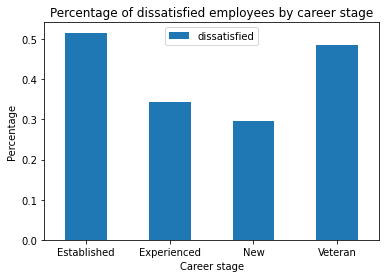

In [168]:
dissatisfied.plot(kind="bar",rot=0)
plt.title("Percentage of dissatisfied employees by career stage")
plt.xlabel("Career stage")
plt.ylabel("Percentage")

# Conclusion

Employees at the DETE and TAFE who are at a later stage in their career (7 or more years of service) are more likely to resign due to dissatisfaction compared to employees with less experience (less than 7 years of service).